# Logistic Regression - 二分类

1. Data 
+ Pre-processing 
+ Feature-Extractor
+ Split Training, Test, Validation
+ Build Model
+ Gradient Descent 
+ Evaluation
+ Predicat
+ Analysis

In [36]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [37]:
from struct import unpack

In [38]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [39]:
test_x, test_y  = loadmnist('dataset/t10k-images-idx3-ubyte', 'dataset/t10k-labels-idx1-ubyte')

In [40]:
train_x, train_y= loadmnist('dataset/train-images-idx3-ubyte', 'dataset/train-labels-idx1-ubyte')

In [41]:
train_x.shape # 60000张图片，784维 即28*28的图片

(60000, 784)

In [42]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

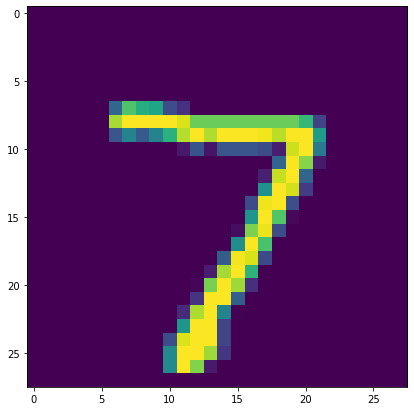

In [43]:
plt.figure(figsize=(20,7))
#plt.imshow(train_x[0].reshape(28,28)) 
plt.imshow(np.reshape(test_x[0],(28,28)))

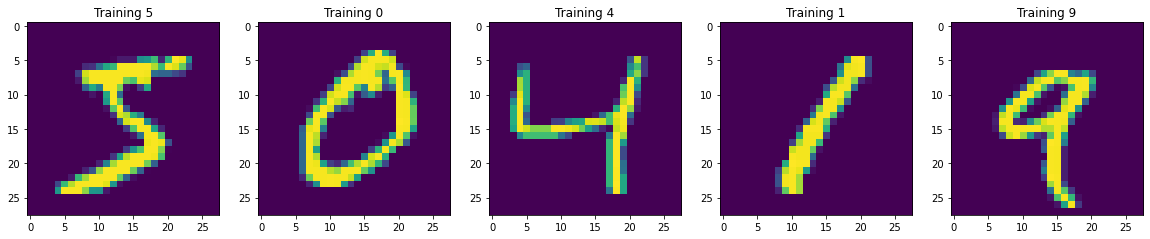

In [44]:
plt.figure(figsize=(20,7))
for index,(image,label) in enumerate(zip(train_x[:5],train_y[:5])):
    
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(train_x[index],(28,28)))
    plt.title('Training {}'.format(label))

## 只选择0和6

In [45]:
# 取下标
zero_indices_train = np.where(train_y == 0)
six_indices_train = np.where(train_y == 6)

zero_indices_test = np.where(test_y == 0)
six_indices_test = np.where(test_y == 6)

train_indices = np.concatenate((zero_indices_train[0],six_indices_train[0]))
test_indices = np.concatenate((zero_indices_test[0],six_indices_test[0]))

In [46]:
# 打乱随机
train_indices = np.random.choice(train_indices,size = len(train_indices),replace = False)
test_indices = np.random.choice(test_indices,size = len(test_indices),replace = False)

In [47]:
val_ratio = 0.2
train_indices = train_indices[:int(len(train_indices)*(1-val_ratio))]
val_indices = train_indices[int(len(train_indices)*(1-val_ratio)):]

In [48]:
binary_xtrain = train_x[train_indices]
binary_ytrain = train_y[train_indices]

binary_xval = train_x[val_indices]
binary_yval = train_y[val_indices]

binary_xtest = test_x[test_indices]
binary_ytest = test_y[test_indices]

In [49]:
binary_xtest.shape

(1938, 784)

Text(0.5, 1.0, 'Training 0')

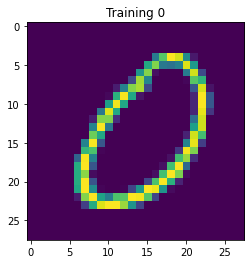

In [50]:
plt.imshow(np.reshape(binary_xtrain[1],(28,28)))
plt.title('Training {}'.format(binary_ytrain[1]))

- 没有做标准化、归一化，因为问题比较简单，效果不错，当遇到复杂问题需要做

In [51]:
from collections import Counter

In [52]:
Counter(binary_ytrain)

Counter({0: 4742, 6: 4730})

In [53]:
Counter(binary_ytest)

Counter({6: 958, 0: 980})

In [54]:
Counter(binary_yval)

Counter({6: 934, 0: 961})

## Build Model

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
clf = LogisticRegression(random_state=0, solver='lbfgs')
# L-BFGS-B – Software for Large-scale Bound-constrained Optimization
clf.fit(binary_xtrain,binary_ytrain)

/opt/anaconda3/envs/AI_edu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [57]:
binary_xtrain.shape

(9472, 784)

In [58]:
binary_ytrain.shape

(9472,)

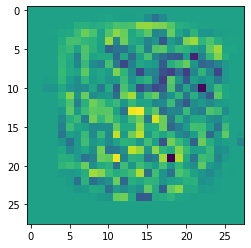

In [59]:
plt.imshow(clf.coef_.reshape(28,28)) # 可视化权重

- 颜色深的地方对识别影响高，如像右上方对0，6识别最重要

In [60]:
clf.intercept_

array([0.00065525])

In [61]:
clf.score(binary_xtrain,binary_ytrain)

1.0

In [62]:
clf.score(binary_xval,binary_yval)

1.0

In [63]:
clf.score(binary_xtest,binary_ytest)

0.9860681114551083

- 属于过拟合,没有欠拟合

In [80]:
pre = clf.predict(binary_xtest)
error = np.where(binary_ytest != pre) # 预测错误的
len(error[0])

27

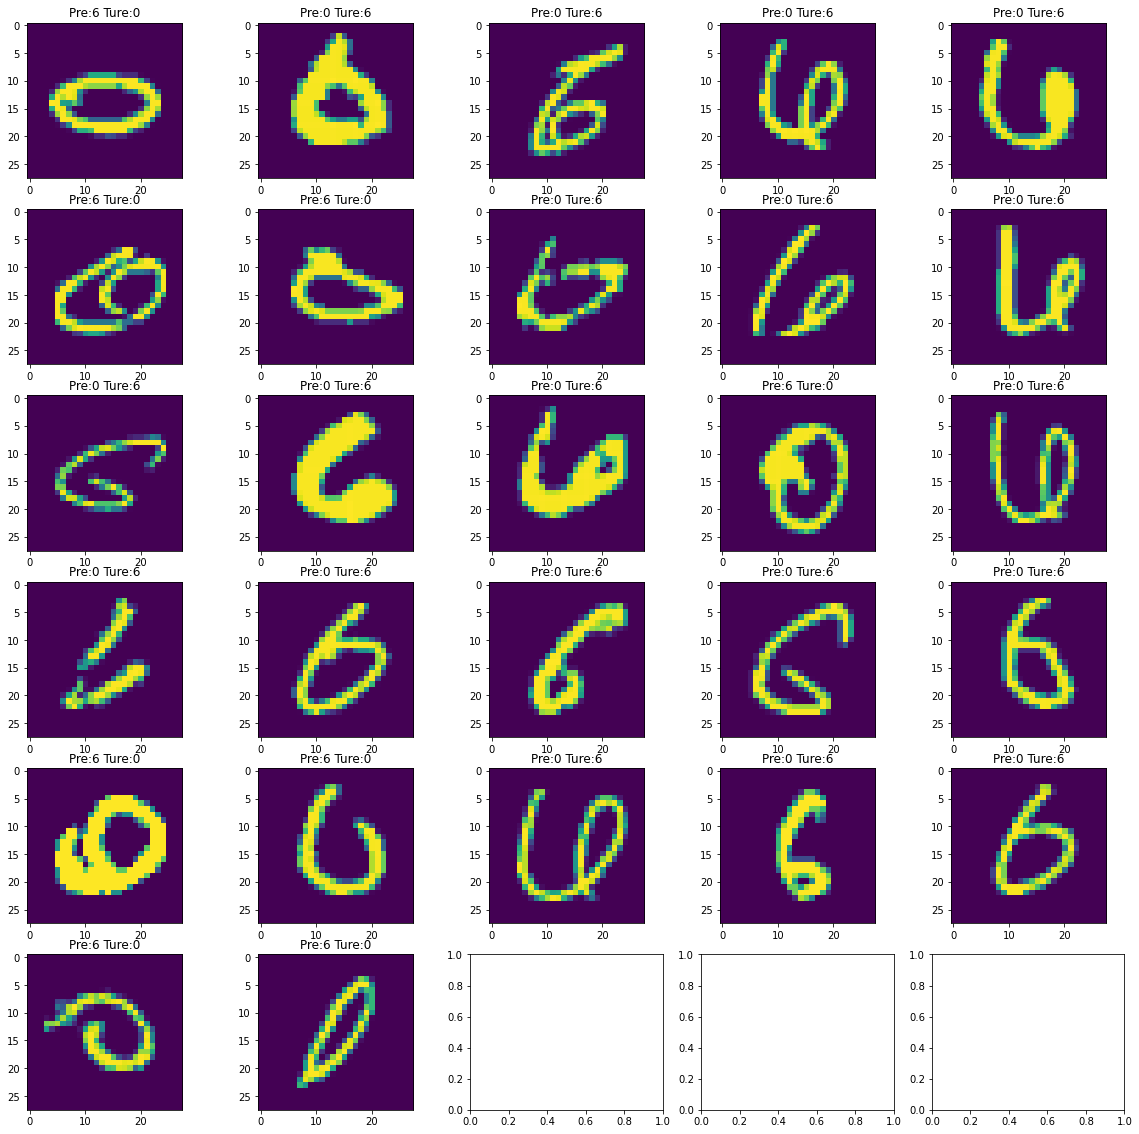

In [81]:
width = 5
fig,ax = plt.subplots(len(error[0])//width+1,width,figsize = (20,20))

for i in range(len(error[0])): # len = 25
    ix = np.unravel_index(i,ax.shape)
    
    plt.sca(ax[ix])
    plt.imshow(binary_xtest[error[0][i]].reshape((28,28)))
    plt.title('Pre:{} Ture:{}'.format(pre[error[0][i]],binary_ytest[error[0][i]]))

## 模型性能

In [82]:
from sklearn import metrics

In [83]:
metrics.precision_score(binary_ytest,pre,pos_label=6)

0.9915522703273495

In [84]:
metrics.precision_score(binary_ytest,pre,pos_label=0)

0.9808274470232089

In [85]:
metrics.precision_recall_fscore_support(binary_ytest,pre,pos_label=6)

/opt/anaconda3/envs/AI_edu/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1298: UserWarning: Note that pos_label (set to 6) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


(array([0.98082745, 0.99155227]),
 array([0.99183673, 0.98016701]),
 array([0.98630137, 0.98582677]),
 array([980, 958]))

In [86]:
??metrics.precision_recall_fscore_support

Signature:
metrics.precision_recall_fscore_support(
    y_true,
    y_pred,
    *,
    beta=1.0,
    labels=None,
    pos_label=1,
    average=None,
    warn_for=('precision', 'recall', 'f-score'),
    sample_weight=None,
    zero_division='warn',
)
Source:   
@_deprecate_positional_args
def precision_recall_fscore_support(y_true, y_pred, *, beta=1.0, labels=None,
                                    pos_label=1, average=None,
                                    warn_for=('precision', 'recall',
                                              'f-score'),
                                    sample_weight=None,
                                    zero_division="warn"):
    """Compute precision, recall, F-measure and support for each class.

    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negat

In [87]:
fpr,tpr,threshold = metrics.roc_curve(binary_ytest,pre,pos_label = 6)
metrics.auc(fpr,tpr)

0.9860018746538283

In [88]:
# 混淆矩阵
cm = metrics.confusion_matrix(binary_ytest,pre)

In [89]:
import seaborn as sn

In [90]:
??sn.heatmap

Signature:
sn.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Source:   
@_deprecate_positional_args
def heatmap(
    data, *,
    vmin=None, vmax=None, cmap=None, center=None, robust=False,
    annot=None, fmt=".2g", annot_kws=None,
    linewidths=0, linecolor="white",
    cbar=True, cbar_kws=None, cbar_ax=None,
    square=False, xticklabels="auto", yticklabels="auto",
    mask=None, ax=None,
    **kwargs
):
    """Plot rectangular data as a color-encoded matrix.

    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless

In [91]:
from sklearn.metrics import confusion_matrix
data = confusion_matrix(binary_ytest,pre)

In [92]:
data

array([[972,   8],
       [ 19, 939]])

In [93]:
df_cm = pd.DataFrame(data, columns=np.unique(binary_ytest), index = np.unique(binary_ytest))

In [94]:
df_cm

,0,6
0,972,8
6,19,939


In [95]:
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predict'

<AxesSubplot:xlabel='Predict', ylabel='Actual'>

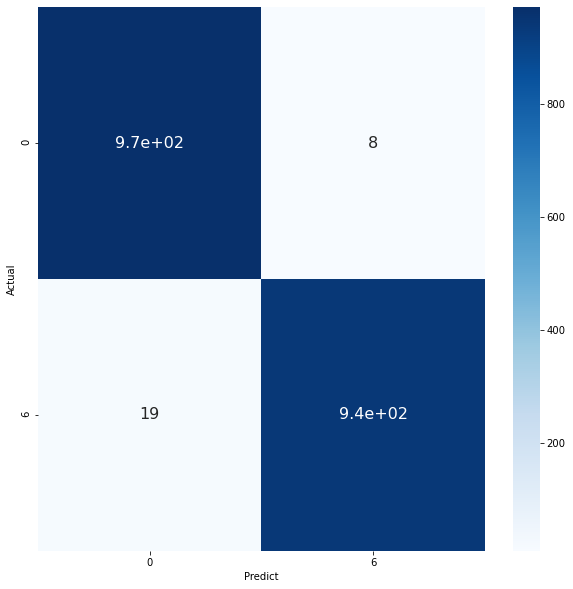

In [96]:
plt.figure(figsize=(10, 10))
sn.heatmap(df_cm, cmap='Blues', annot=True, annot_kws={"size": 16})